#### Data Analysis using matplotlib
we,humans,are being highly trained in finding patterns and information visually. So, using standard matplotlib package and seaborn package for some extra statistical plots, let us plot some 1D or 2D plots and find something interesting in data.

In [161]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.colors import ListedColormap

Dataset : Heart Disease

link:     http://archive.ics.uci.edu/ml/datasets/heart+Disease

Description:

The following dataset has been used to determine heart disease in the patient. While '0' indicates no heart disease, '1','2','3','4' indicates some kind of heart disease exist in patients.

The dataset has 14 attributes including class attribute('NUM').

The dataset has some missing values indicated by '?'

#### Loading dataset into a pandas DataFrame

In [160]:
# load the data using pandas read_csv function and replace the missing value indicated by '?' into NaN
hd_data=pd.read_csv("data/Heart_Disease.csv",na_values='?')
hd_data.head()

,AGE,SEX,CP,TRESTBPC,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [162]:
# determine the shape of data
instances,features  = hd_data.shape
print(instances,features)

303 14


In [3]:
# missing values can be replaced by specific value or mean of that particular column etc..
hd_data['CA'].fillna(0.0, inplace=True)
hd_data['THAL'].fillna(hd_data['THAL'].mean(), inplace=True)

In [4]:
pd.isnull(hd_data).any()

AGE         False
SEX         False
CP          False
TRESTBPC    False
CHOL        False
FBS         False
RESTECG     False
THALACH     False
EXANG       False
OLDPEAK     False
SLOPE       False
CA          False
THAL        False
NUM         False
dtype: bool

In [5]:
# for the purpose of analysis, replacing the values 2, 3, 4 into 1 to classify 
# all of them as presence of heart disease
hd_data['NUM'].replace([2,3,4], 1, inplace=True)

#### Using Seaborn's heatmap let us know the correlation of pairs of attributes.

First step is to determine the correlation matrix using corr() function.
Since the matrix is symmetric, we will use only one half of the matrix to display heat map. The range of correlation value is [-.25; 1], thus the value can be color coded using a diverging color map - one hue for each sign and saturation for absolute value.

The second half portion of graph(upper half), can be used to display actual correlation value.


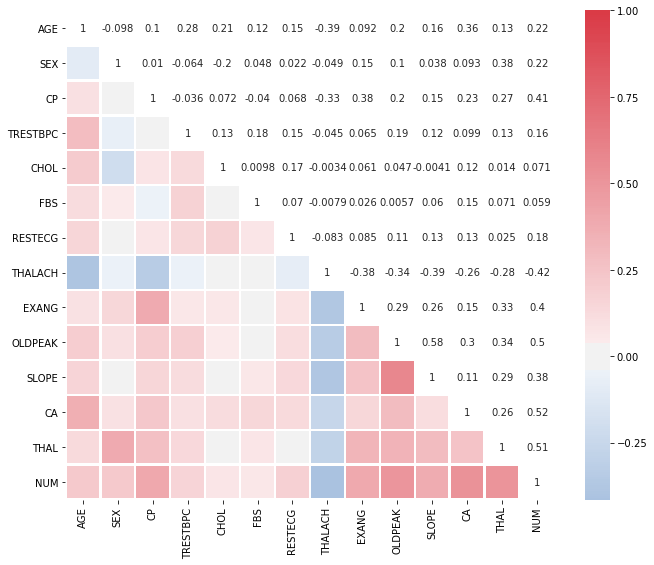

In [170]:
# Compute the correlation matrix
corr = hd_data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5,)
# Generate a mask for the lower triangle
mask = np.ones_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,cmap=ListedColormap(['white']) ,mask=mask,annot=True,cbar=False, linewidths=1.5,)

From the above graph, for example we can see, CA , THAL are more correlated to NUM than RESTECG.
Thus from the graph, we can examine which features are highly correlated and then use this information to remove highly correlated features and keep only features that are more independant to each other(Feature reduction before applying to any Machine learning algorithm).






##### Let us now start with some basic analysis of each attribute.

#### Below bar graph shows the number of patient suffering heart disease and not suffering heart disease

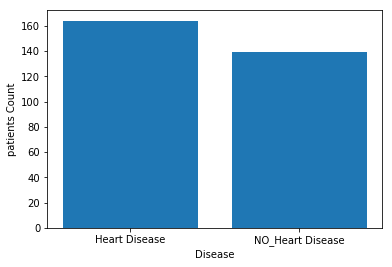

In [62]:
result=hd_data['NUM'].value_counts()
values, counts = result.index, result
plt.bar(values, counts)
plt.xticks( np.arange(2), ('Heart Disease','NO_Heart Disease'))
plt.xlabel("Disease")
plt.ylabel("patients Count")

Out of 303, 164 people suffer some kind of heart problem whereas 139 people dont have any heart problem.

##### Below bar graph shows the number of males suffering heart disease vs females suffering heart disease

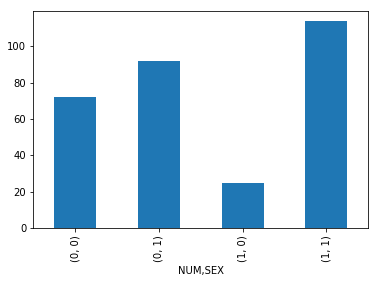

In [128]:
hd_data.groupby(['NUM','SEX'])['SEX'].count().plot(kind = 'bar')


From the above results, males are more likely to suffer from heart disease than females.

##### Now Let us plot a histogram of values for 'AGE' attribute where Patients suffer from Heart Disease. Histogram acts as an estimation of the probability density function and gives us a better understanding how values of Age attribute looks like.


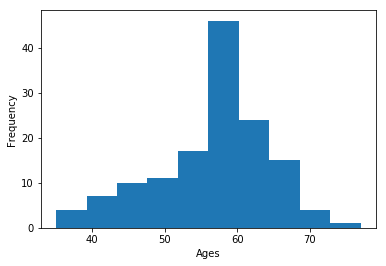

In [138]:
t=plt.hist(hd_data['AGE'][hd_data['NUM']==1])
plt.xlabel("Ages")
plt.ylabel("Frequency")

Also, we can use seaborn's 'distplot'  to combine a histogram with a kernel density estimation (KDE) plot into a single plot.


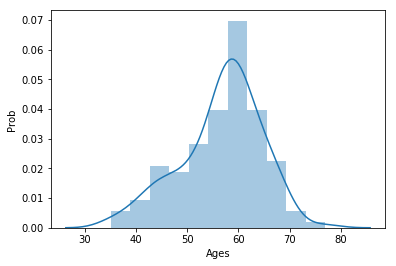

In [139]:
sns.distplot(hd_data['AGE'][hd_data['NUM']==1])
plt.xlabel("Ages")
plt.ylabel("Prob")

From the above graph , we can see, its more likely for people after age 50 suffer from some kind of heart disease.

#### Pair-wise joint plots

Using Pair-wise plots we can dig deeper into the relation of attribute pairs by examining their joint distributions.In addition to a 2D plot with each axis representing the particular attribute range and the points on the plot representing the probability of both attribute at once,Seaborn adds a plot by adding a small histogram for both attributes with the correlation value and significance.

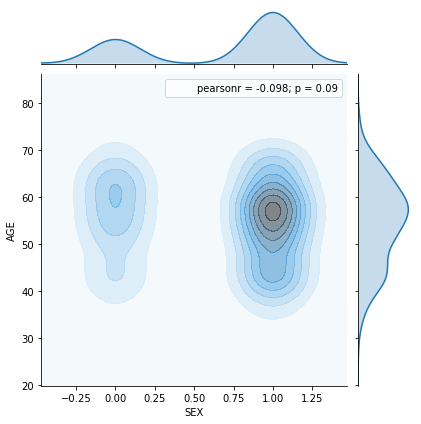

In [159]:
x, y = hd_data['SEX'],hd_data['AGE']
sns.jointplot(x, y, kind='kde', joint_kws={'alpha':0.5})

The above plot has a 2D plot with SEX and AGE and also, each Attribute has their own Histogram plots.

From the above graph , we can see, men with age in the 50's are more likely to suffer from some Heart disease.
